In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
print(test_data.shape, train_data.shape)


(418, 11) (891, 12)


In [4]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


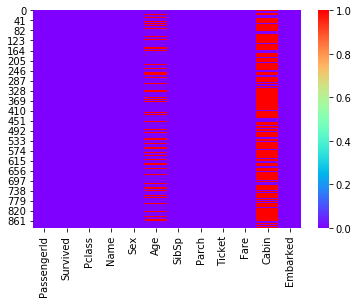

In [5]:
sns.heatmap(train_data.isnull(),cmap='rainbow')

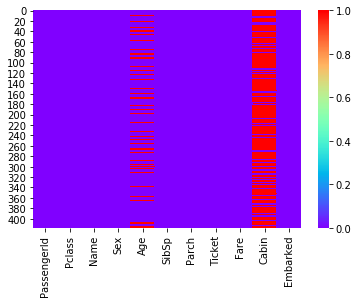

In [6]:
sns.heatmap(test_data.isnull(),cmap='rainbow')

In [7]:
#cabin has too much null values so we are gonna drop this columns
#age column has significant amount of noise but as we can retain this column 
# by filling in the mean values

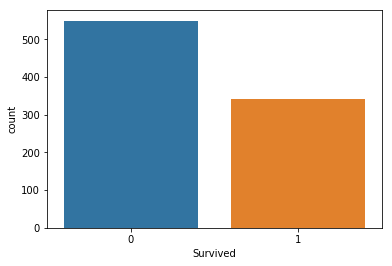

In [8]:
sns.countplot(x='Survived', data=train_data)

In [9]:
#number of people survued are less as compared to other

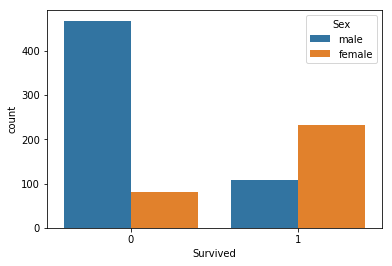

In [10]:
sns.countplot(x='Survived', data=train_data, hue='Sex')

In [11]:
#the number of female survived is more than the males who survived

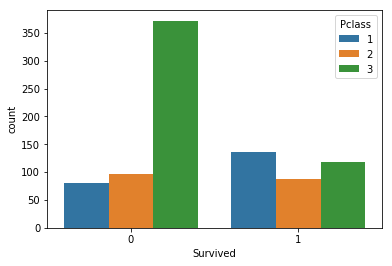

In [12]:
sns.countplot(x='Survived', data=train_data, hue='Pclass')

In [13]:
#the number of people who died in titanic crash are from 3class

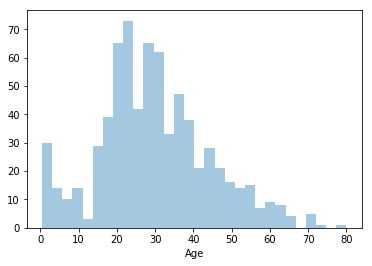

In [14]:
sns.distplot(train_data['Age'].dropna(), kde=False, bins=30)

In [15]:
#there are lot of people of between 30-40 

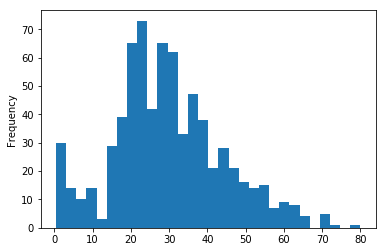

In [16]:
train_data['Age'].plot.hist(bins=30)

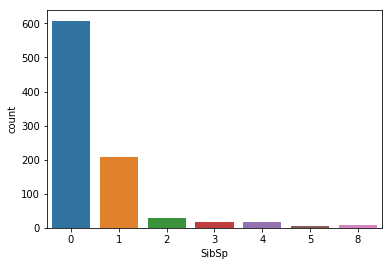

In [17]:
sns.countplot(x='SibSp', data=train_data)

In [18]:
#most people are without any sibings

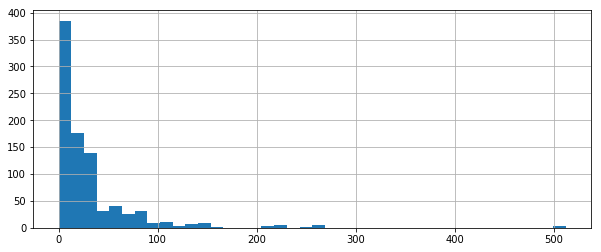

In [19]:
train_data['Fare'].hist(bins=40, figsize=(10,4))

In [20]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

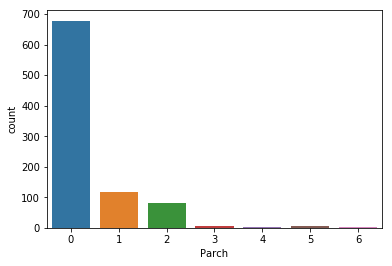

In [21]:
sns.countplot(train_data['Parch'])

In [22]:
# We have gone through each columns and gain insights about the dataset

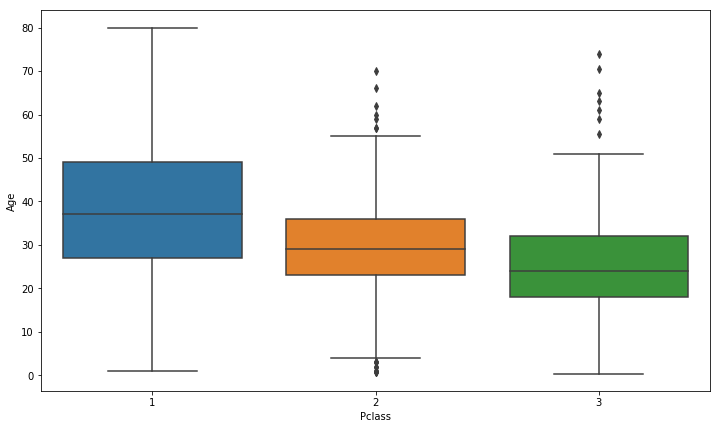

In [23]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train_data)

In [24]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [25]:
train_data['Age'] = train_data[['Age','Pclass']].apply(impute_age, axis=1)
test_data['Age'] = test_data[['Age','Pclass']].apply(impute_age, axis=1)

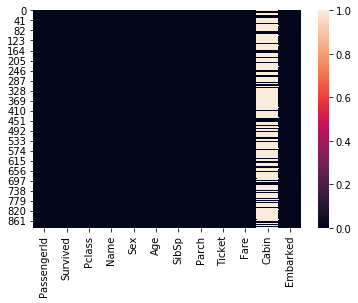

In [26]:
sns.heatmap(train_data.isnull())

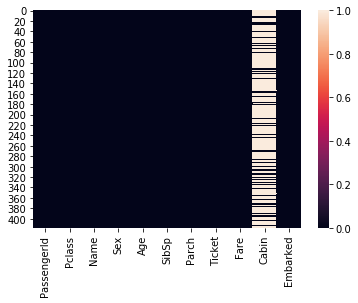

In [27]:
sns.heatmap(test_data.isnull())

In [28]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [29]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [30]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [31]:
sex = pd.get_dummies(train_data['Sex'], prefix='_',drop_first=True)
pclass = pd.get_dummies(train_data['Pclass'], prefix='_',drop_first=True)


In [32]:
train_data = pd.concat([train_data,sex,pclass], axis=1)

In [33]:
train_data.drop(['Sex','Name','PassengerId','Ticket','Cabin','Embarked'],axis=1,inplace=True)

In [34]:
train_data.drop('Pclass', inplace=True,axis=1)

In [35]:
train_data.head()

,Survived,Age,SibSp,Parch,Fare,__male,__2,__3
0,0,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,1,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,0
4,0,35.0,0,0,8.0500,1,0,1


In [36]:
sex = pd.get_dummies(test_data['Sex'], prefix='_',drop_first=True)
pclass = pd.get_dummies(test_data['Pclass'], prefix='_',drop_first=True)
test_data = pd.concat([test_data,sex,pclass], axis=1)
test_data.drop(['Sex','Name','PassengerId','Ticket','Cabin','Embarked','Pclass'],axis=1,inplace=True)

test_data.head()

,Age,SibSp,Parch,Fare,__male,__2,__3
0,34.5,0,0,7.8292,1,0,1
1,47.0,1,0,7.0000,0,0,1
2,62.0,0,0,9.6875,1,1,0
3,27.0,0,0,8.6625,1,0,1
4,22.0,1,1,12.2875,0,0,1


In [37]:
train_data.head()

,Survived,Age,SibSp,Parch,Fare,__male,__2,__3
0,0,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,1,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,0
4,0,35.0,0,0,8.0500,1,0,1


In [38]:
target = train_data['Survived']

In [39]:
train_data = train_data.drop('Survived',axis=1)

In [40]:
train_data['training_set'] = True
test_data['training_set']  = False


In [41]:
full_data = pd.concat([train_data,test_data])

In [42]:
full_data = full_data.interpolate()
full_data = pd.get_dummies(full_data)

In [43]:
train_data = full_data[full_data['training_set']==True]
train_data = train_data.drop('training_set', axis=1)


test_data = full_data[full_data['training_set']==False]
test_data = test_data.drop('training_set', axis=1)

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
lreg = LogisticRegression()
lreg.fit(train_data,target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [46]:
y_pred = lreg.predict(test_data)

In [70]:
my_submission = pd.DataFrame({'PassengerId': [i for i in range(892,1310)], 'Survived': y_pred,})
my_submission.to_csv('mysubmission.csv', index=False)

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0,